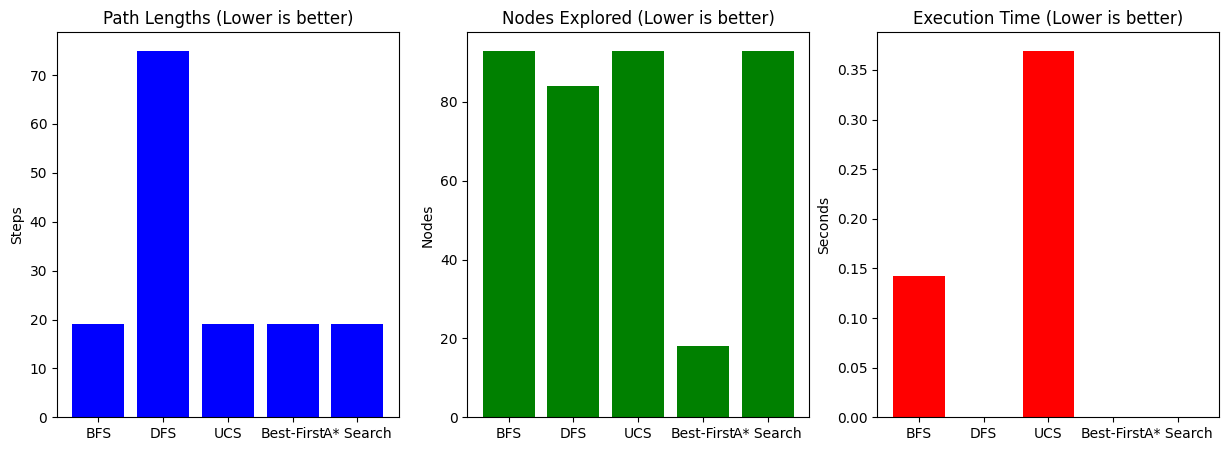

In [ ]:
import time
import heapq
import matplotlib.pyplot as plt
from collections import deque

# Grid size and obstacles
GRID_SIZE = (10, 10)
OBSTACLES = {(3, 3), (3, 4), (3, 5), (6, 6), (6, 7), (6, 8)}
START = (0, 0)
GOAL = (9, 9)

# Directions: Right, Left, Down, Up
DIRECTIONS = [(0, 1), (0, -1), (1, 0), (-1, 0)]

# Function to check valid moves
def is_valid(x, y, visited):
    return 0 <= x < GRID_SIZE[0] and 0 <= y < GRID_SIZE[1] and (x, y) not in OBSTACLES and (x, y) not in visited

# Breadth-First Search (BFS)
def bfs(start, goal):
    queue = deque([(start, [start])])
    visited = set()
    while queue:
        (x, y), path = queue.popleft()
        if (x, y) == goal:
            return path, len(visited)
        visited.add((x, y))
        for dx, dy in DIRECTIONS:
            nx, ny = x + dx, y + dy
            if is_valid(nx, ny, visited):
                queue.append(((nx, ny), path + [(nx, ny)]))
    return None, len(visited)

# Depth-First Search (DFS)
def dfs(start, goal):
    stack = [(start, [start])]
    visited = set()
    while stack:
        (x, y), path = stack.pop()
        if (x, y) == goal:
            return path, len(visited)
        visited.add((x, y))
        for dx, dy in DIRECTIONS:
            nx, ny = x + dx, y + dy
            if is_valid(nx, ny, visited):
                stack.append(((nx, ny), path + [(nx, ny)]))
    return None, len(visited)

# Uniform Cost Search (UCS)
def ucs(start, goal):
    pq = [(0, start, [start])]
    visited = set()
    while pq:
        cost, (x, y), path = heapq.heappop(pq)
        if (x, y) == goal:
            return path, len(visited)
        visited.add((x, y))
        for dx, dy in DIRECTIONS:
            nx, ny = x + dx, y + dy
            if is_valid(nx, ny, visited):
                heapq.heappush(pq, (cost + 1, (nx, ny), path + [(nx, ny)]))
    return None, len(visited)

# Best-First Search
def best_first(start, goal):
    pq = [(abs(start[0] - goal[0]) + abs(start[1] - goal[1]), start, [start])]
    visited = set()
    while pq:
        _, (x, y), path = heapq.heappop(pq)
        if (x, y) == goal:
            return path, len(visited)
        visited.add((x, y))
        for dx, dy in DIRECTIONS:
            nx, ny = x + dx, y + dy
            if is_valid(nx, ny, visited):
                heapq.heappush(pq, (abs(nx - goal[0]) + abs(ny - goal[1]), (nx, ny), path + [(nx, ny)]))
    return None, len(visited)

# A* Search
def a_star(start, goal):
    pq = [(0, start, [start])]
    g_cost = {start: 0}
    visited = set()
    while pq:
        _, (x, y), path = heapq.heappop(pq)
        if (x, y) == goal:
            return path, len(visited)
        visited.add((x, y))
        for dx, dy in DIRECTIONS:
            nx, ny = x + dx, y + dy
            if is_valid(nx, ny, visited):
                new_cost = g_cost[(x, y)] + 1
                if (nx, ny) not in g_cost or new_cost < g_cost[(nx, ny)]:
                    g_cost[(nx, ny)] = new_cost
                    priority = new_cost + abs(nx - goal[0]) + abs(ny - goal[1])  # f = g + h
                    heapq.heappush(pq, (priority, (nx, ny), path + [(nx, ny)]))
    return None, len(visited)

# Compare all algorithms
def compare_algorithms():
    algorithms = {
        "BFS": bfs,
        "DFS": dfs,
        "UCS": ucs,
        "Best-First": best_first,
        "A* Search": a_star
    }
    results = {}

    for name, func in algorithms.items():
        start_time = time.time()
        path, nodes_explored = func(START, GOAL)
        end_time = time.time()
        execution_time = end_time - start_time
        results[name] = (len(path) if path else float('inf'), nodes_explored, execution_time)

    return results

# Visualizing Results
def visualize_results(results):
    labels = list(results.keys())
    path_lengths = [results[name][0] for name in labels]
    nodes_explored = [results[name][1] for name in labels]
    times = [results[name][2] for name in labels]

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].bar(labels, path_lengths, color='blue')
    ax[0].set_title("Path Lengths (Lower is better)")
    ax[0].set_ylabel("Steps")

    ax[1].bar(labels, nodes_explored, color='green')
    ax[1].set_title("Nodes Explored (Lower is better)")
    ax[1].set_ylabel("Nodes")

    ax[2].bar(labels, times, color='red')
    ax[2].set_title("Execution Time (Lower is better)")
    ax[2].set_ylabel("Seconds")

    plt.show()

# Run and visualize results
results = compare_algorithms()
visualize_results(results)
